<h2>Content</h2><br >
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.<br />

<h2>Feature Description</h2><br />
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.<br />

To ease your start with the data you can read the feature descriptions below:<br />

<b>View "PhotoObj"</b><br />
objid = Object Identifier<br />
ra = J2000 Right Ascension (r-band)<br />
dec = J2000 Declination (r-band)<br />
Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.<br />

Source: https://en.wikipedia.org/wiki/Right_ascension<br />

u = better of DeV/Exp magnitude fit<br />
g = better of DeV/Exp magnitude fit<br />
r = better of DeV/Exp magnitude fit<br />
i = better of DeV/Exp magnitude fit<br />
z = better of DeV/Exp magnitude fit<br />
The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.<br />

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html<br />

run = Run Number<br />
rereun = Rerun Number<br />
camcol = Camera column<br />
field = Field number<br />
Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by: - run number, which identifies the specific scan, - the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and - the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs. - An additional number, rerun, specifies how the image was processed.<br />

<b>View "SpecObj"</b><br />
specobjid = Object Identifier<br />
class = object class (galaxy, star or quasar object)<br />
The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.<br />

redshift = Final Redshift<br />
plate = plate number<br />
mjd = MJD of observation<br />
fiberid = fiber ID<br />
In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.<br />

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.<br />

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.<br />

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.<br />

Further information on SDSS images and their attributes:<br />
http://www.sdss3.org/dr9/imaging/imaging_basics.php<br />
http://www.sdss3.org/dr8/glossary.php<br />

<h2>Acknowledgements</h2><br />
The data released by the SDSS is under public domain. Its taken from the current data release RD14.<br />

More information about the license:<br />
http://www.sdss.org/science/image-gallery/<br />

It was acquired by querying the CasJobs database which contains all data published by the SDSS.<br />
The exact query can be found at:<br />
http://skyserver.sdss.org/CasJobs/ (Free account is required!)<br />

There are also other ways to get data from the SDSS catalogue. They can be found under:<br />
http://www.sdss.org/dr14/<br />

They really have a huge database which offers the possibility of creating all kinds of tables with respect to personal interests.<br />

    <h2>Inspiration</h2><br />
The dataset offers plenty of information about space to explore. Also the class column is the perfect target for classification practices!<br />

Note: Since the data was already maintained very well it might not be best dataset to practice data cleaning / filtering...your decision though.<br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats as sts
import pandas_profiling as pf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Let's Import the data now
sdss_raw = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
sdss_raw.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
sdss_raw.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [4]:
# Create a pandas Profiling Report to get first level knowledge of the data
#sdss_raw.profile_report(title="SDSS Profiling Data").to_file(output_file='profiling_report.html')

### From above initial report we can -
- Drop highly correlated variables
- Drop objid since it is constant
- Drop variables having constant values
- Get Dummies for Nominal Variables

In [5]:
sdss_raw.drop(['objid', 'rerun', 'specobjid'], axis=1, inplace=True)

### Now, let's create a Data Audit Report and then continue onwards to FEATURE ANALYSIS

In [6]:
num_cols = [feature for feature in dict(sdss_raw.dtypes) if sdss_raw[feature].dtypes in ['float64', 'int64', 'int32', 'float32']]
cat_cols = [feature for feature in dict(sdss_raw.dtypes) if sdss_raw[feature].dtypes in ['object', 'O']]

In [7]:
def num_summary(x):
    return (pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                      index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX']))

def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

In [8]:
num_report = sdss_raw[num_cols].apply(num_summary).T
num_report

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
ra,10000.0,0.0,1.755300e+06,175.529987,180.394514,47.783439,2.283257e+03,0.272224,8.235100,11.870227,62.119890,126.154688,157.370946,180.394514,201.547279,235.382100,243.815260,256.324004,260.884382
dec,10000.0,0.0,1.483615e+05,14.836148,0.404166,25.212207,6.356554e+02,1.699377,-5.382632,-4.345488,-1.773121,-1.103273,-0.539035,0.404166,35.649397,61.915849,66.175507,67.933288,68.542265
u,10000.0,0.0,1.861936e+05,18.619355,18.853095,0.828656,6.866708e-01,0.044505,12.988970,16.143369,16.971334,17.410641,18.178035,18.853095,19.259232,19.468176,19.534464,19.587268,19.599900
g,10000.0,0.0,1.737193e+05,17.371931,17.495135,0.945457,8.938893e-01,0.054424,12.799550,14.822694,15.619552,16.091143,16.815100,17.495135,18.010145,18.425304,18.821572,19.319405,19.918970
r,10000.0,0.0,1.684096e+05,16.840963,16.858770,1.067764,1.140121e+00,0.063403,12.431600,14.301702,15.022896,15.466749,16.173333,16.858770,17.512675,18.179295,18.702753,19.250103,24.802040
i,10000.0,0.0,1.658358e+05,16.583579,16.554985,1.141805,1.303718e+00,0.068852,11.947210,14.031901,14.738591,15.164274,15.853705,16.554985,17.258550,18.073096,18.619721,19.201817,28.179630
z,10000.0,0.0,1.642283e+05,16.422833,16.389945,1.203188,1.447661e+00,0.073263,11.610410,13.799104,14.518281,14.939181,15.618285,16.389945,17.141447,18.028130,18.577198,19.282988,22.833060
run,10000.0,0.0,9.810348e+06,981.034800,756.000000,273.305024,7.469564e+04,0.278589,308.000000,745.000000,752.000000,752.000000,752.000000,756.000000,1331.000000,1350.000000,1402.000000,1412.000000,1412.000000
camcol,10000.0,0.0,3.648700e+04,3.648700,4.000000,1.666183,2.776166e+00,0.456651,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
field,10000.0,0.0,3.023801e+06,302.380100,299.000000,162.577763,2.643153e+04,0.537660,11.000000,15.000000,32.950000,76.000000,184.000000,299.000000,414.000000,540.000000,582.000000,682.000000,768.000000


In [9]:
cat_report = sdss_raw[cat_cols].apply(cat_summary).T
cat_report

,N,NMISS,ColumnsNames
class,10000,0,GALAXY 4998 STAR 4152 QSO 850 N...


## DATA PREPARATION NOW

#### Since the output variable has 3 classes(Multinomial Classification), for simplicity sakes we group together Star and Quasars for easy Binomial Classification

In [10]:
sdss_raw['class'] = np.where( sdss_raw['class'] == "GALAXY", 1, 2)

In [11]:
# Check For Outliers
# camcol is categorical with 1-6 categories, clearly cnt depict outliers
# We start with Declination 'dec', which has a assymetrical figure (we apply 95%-99% rule)
sdss_raw['dec'].clip(lower=sdss_raw['dec'].quantile(0.01), upper=sdss_raw['dec'].quantile(0.99), inplace=True)

In [12]:
# Next, fiberid is also Assymetrical in nature
sdss_raw['fiberid'].clip(lower=sdss_raw['fiberid'].quantile(0.01), upper=sdss_raw['fiberid'].quantile(0.99), inplace=True)

In [13]:
# Next goes, field is also Asymmterical in nature
sdss_raw['field'].clip(lower=sdss_raw['field'].quantile(0.01), upper=sdss_raw['field'].quantile(0.99), inplace=True)

In [14]:
# 3*Sigma Rule for 'g' as it shows Gaussian Distribution
g_lc = sdss_raw['g'].mean() - 3*sdss_raw['g'].std()
g_uc = sdss_raw['g'].mean() + 3*sdss_raw['g'].std()
sdss_raw['g'].clip(lower=g_lc, upper=g_uc, inplace=True)

In [15]:
sdss_raw['mjd'].clip(lower=sdss_raw['mjd'].quantile(0.01), upper=sdss_raw['mjd'].quantile(0.99), inplace=True)

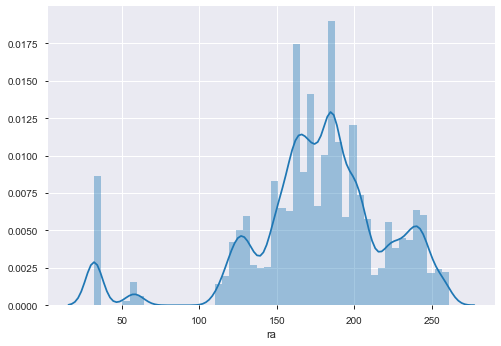

In [16]:
# Column 'ra' seems to be Gaussian in nature with some outliers on the left side of the graph
ra_lc = sdss_raw['ra'].mean() - 3*sdss_raw['ra'].std()
ra_uc = sdss_raw['ra'].mean() + 3*sdss_raw['ra'].std()
sdss_raw['ra'].clip(lower=ra_lc, upper=ra_uc, inplace=True)
sns.distplot(sdss_raw['ra'])
# This graph seems a left out spike in the left-most region. We will come back to it once we build the model
# just to cross check this, how the removal of the leftmost spike affects my future model

In [17]:
# Same 95%-99% rule for 'redshift' column as well
sdss_raw['redshift'].clip(lower=sdss_raw['redshift'].quantile(0.01), upper=sdss_raw['redshift'].quantile(0.99), inplace=True)

In [18]:
# Same for 'run', 95%-99% Rule
sdss_raw['run'].clip(lower=sdss_raw['run'].quantile(0.01), upper=sdss_raw['run'].quantile(0.99), inplace=True)

In [19]:
# For 'u' col also the same 95%-99% rule
sdss_raw['u'].clip(lower=sdss_raw['u'].quantile(0.01), upper=sdss_raw['u'].quantile(0.99), inplace=True)

In [20]:
# Let's go for DUMMY CREATIONS for nominal variable - 'camcol'
camcol_dummied = pd.get_dummies(sdss_raw['camcol'], prefix="camcol", prefix_sep="-")
camcol_dummied.drop(['camcol-6'], axis=1, inplace=True)

In [21]:
sdss_raw = pd.concat([sdss_raw, camcol_dummied], axis=1)
# Drop the original 'camcol' column
sdss_raw.drop(['camcol'], axis=1, inplace=True)

In [22]:
# Check For Balanced/Imbalanced Data
#1s - #Galaxies :
print("#Entries classified as Galaxy :\t{}".format(sdss_raw[sdss_raw['class']==1].shape[0]))
#2s - #Stars/Quasars
print("#Entries classified as Star/Quasar :\t{}".format(sdss_raw[sdss_raw['class']==2].shape[0]))
# As such data is almost balanced (We don't need to balance it)

#Entries classified as Galaxy :	4998
#Entries classified as Star/Quasar :	5002


In [23]:
sdss = sdss_raw[['ra', 'dec', 'run', 'field', 'redshift', 'plate', 'mjd', 'fiberid', 'u', 'g', 'r', 'i', 'z', 'camcol-1', 'camcol-2', 'camcol-3', 'camcol-4', 'camcol-5']]
sdss_y = sdss_raw[['class']]

In [24]:
sdss

,ra,dec,run,field,redshift,plate,mjd,fiberid,u,g,r,i,z,camcol-1,camcol-2,camcol-3,camcol-4,camcol-5
0,183.531326,0.089693,752,267,-0.000009,3306,54922,491.0,19.47406,17.04240,15.94699,15.50342,15.22531,0,0,0,1,0
1,183.598371,0.135285,752,267,-0.000055,323,51615,541.0,18.66280,17.21449,16.67637,16.48922,16.39150,0,0,0,1,0
2,183.680207,0.126185,752,268,0.123111,287,52023,513.0,19.38298,18.19169,17.47428,17.08732,16.80125,0,0,0,1,0
3,183.870529,0.049911,752,269,-0.000111,3306,54922,510.0,17.76536,16.60272,16.16116,15.98233,15.90438,0,0,0,1,0
4,183.883288,0.102557,752,269,0.000590,3306,54922,512.0,17.55025,16.26342,16.43869,16.55492,16.61326,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,1345,161,0.027583,447,51877,246.0,18.81777,17.47053,16.91508,16.68305,16.50570,0,0,1,0,0
9996,131.306083,51.671341,1345,162,0.117772,447,51877,228.0,18.27255,17.43849,17.07692,16.71661,16.69897,0,0,1,0,0
9997,131.552562,51.666986,1345,162,-0.000402,7303,56748,622.0,18.75818,17.77784,17.51872,17.43302,17.42048,0,0,1,0,0
9998,131.477151,51.753068,1345,163,0.014019,447,51877,229.0,18.88287,17.91068,17.53152,17.36284,17.13988,0,0,1,0,0


In [25]:
sdss_y

,class
0,2
1,2
2,1
3,2
4,2
...,...
9995,1
9996,1
9997,2
9998,1


### FEATURE ENGINEERING - Variable Reduction

In [26]:
#1 - Coefficient Of Variation (CV)
def coef_var(x):
    return (pd.Series([x.std()/x.mean()]))
cv_matrix = sdss.apply(coef_var).T
cv_matrix.columns = ['Coefficient Of Variation']
cv_matrix
# From below table, Columns - 'mjd', 'u', 'g', 'i', 'r', 'z' have CV < 0.1 and may be dropped as they have no
# significant variance in their values and hence they contribute very less

,Coefficient Of Variation
ra,0.262645
dec,1.698307
run,0.275889
field,0.535536
redshift,2.616772
plate,1.224363
mjd,0.028438
fiberid,0.581252
u,0.043569
g,0.054060


In [27]:
#2 - Correlation Analysis - To remove Multicolinearity among the input features - USING VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = pd.DataFrame()
sdss_temp = add_constant(sdss)
vif['Features'] = sdss_temp.columns
vif['VIF Factor'] = [variance_inflation_factor(sdss_temp.values, i) for i in range(sdss_temp.shape[1])]
vif.set_index(vif.Features, inplace=True)
vif.drop(['Features'], axis=1, inplace=True)
vif
# From below VIF values, columns - 'plate', 'mjd', 'u', 'g', 'r', 'i', 'z' depict some kind of MULTICOLINEARITY

,VIF Factor
Features,
const,21059.217104
ra,1.874650
dec,3.655130
run,5.042227
field,3.003236
redshift,1.558637
plate,16.078837
mjd,16.508028
fiberid,1.803157


In [28]:
# Let's Perform the tests again after removing the unnecessary columns
sdss_new = sdss.drop(['plate', 'mjd', 'r', 'i', 'g', 'u', 'z'], axis=1) 
cv_matrix_new = sdss_new.apply(coef_var).T
cv_matrix_new.columns = ['Coefficient Of Variation']
cv_matrix_new

,Coefficient Of Variation
ra,0.262645
dec,1.698307
run,0.275889
field,0.535536
redshift,2.616772
fiberid,0.581252
camcol-1,2.589369
camcol-2,2.200365
camcol-3,2.326112
camcol-4,2.110215


In [29]:
vif_new = pd.DataFrame()
sdss_temp = add_constant(sdss_new)
vif_new['Features'] = sdss_temp.columns
vif_new['VIF Factor'] = [variance_inflation_factor(sdss_temp.values, i) for i in range(sdss_temp.shape[1])]
vif_new.set_index(vif_new.Features, inplace=True)
vif_new.drop(['Features'], axis=1, inplace=True)
vif_new

,VIF Factor
Features,
const,94.224267
ra,1.857417
dec,3.652480
run,5.012077
field,2.997329
redshift,1.008709
fiberid,1.660793
camcol-1,1.807023
camcol-2,2.052838


In [30]:
# Since the values are good, we make sdss=sdss_new
sdss=sdss_new

In [31]:
sdss

,ra,dec,run,field,redshift,fiberid,camcol-1,camcol-2,camcol-3,camcol-4,camcol-5
0,183.531326,0.089693,752,267,-0.000009,491.0,0,0,0,1,0
1,183.598371,0.135285,752,267,-0.000055,541.0,0,0,0,1,0
2,183.680207,0.126185,752,268,0.123111,513.0,0,0,0,1,0
3,183.870529,0.049911,752,269,-0.000111,510.0,0,0,0,1,0
4,183.883288,0.102557,752,269,0.000590,512.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,1345,161,0.027583,246.0,0,0,1,0,0
9996,131.306083,51.671341,1345,162,0.117772,228.0,0,0,1,0,0
9997,131.552562,51.666986,1345,162,-0.000402,622.0,0,0,1,0,0
9998,131.477151,51.753068,1345,163,0.014019,229.0,0,0,1,0,0


In [32]:
#3 Let's check the correlation matrix
sdss.corr().to_csv('Correlation Matrix.csv')
sdss.corr()
# From the below correlation matrix we see that 'run' and 'dec' depict a high correlation coefficient value

,ra,dec,run,field,redshift,fiberid,camcol-1,camcol-2,camcol-3,camcol-4,camcol-5
ra,1.000000,0.002865,-0.100649,0.599151,0.029499,0.051145,0.140548,0.029387,-0.263920,0.001625,0.065954
dec,0.002865,1.000000,0.782400,-0.132785,0.070813,0.155648,-0.096484,-0.075079,0.039721,0.061523,-0.017937
run,-0.100649,0.782400,1.000000,-0.477778,0.060983,0.145579,-0.049786,-0.120779,0.020449,-0.031188,0.009359
field,0.599151,-0.132785,-0.477778,1.000000,0.015754,-0.039268,0.051355,0.159369,-0.181814,-0.077279,0.107254
redshift,0.029499,0.070813,0.060983,0.015754,1.000000,0.043933,0.012177,-0.011760,-0.020611,0.006146,0.015795
fiberid,0.051145,0.155648,0.145579,-0.039268,0.043933,1.000000,-0.284535,-0.355874,-0.208777,0.317045,0.257709
camcol-1,0.140548,-0.096484,-0.049786,0.051355,0.012177,-0.284535,1.000000,-0.175531,-0.166042,-0.183030,-0.182602
camcol-2,0.029387,-0.075079,-0.120779,0.159369,-0.011760,-0.355874,-0.175531,1.000000,-0.195397,-0.215388,-0.214885
camcol-3,-0.263920,0.039721,0.020449,-0.181814,-0.020611,-0.208777,-0.166042,-0.195397,1.000000,-0.203745,-0.203268
camcol-4,0.001625,0.061523,-0.031188,-0.077279,0.006146,0.317045,-0.183030,-0.215388,-0.203745,1.000000,-0.224065


In [33]:
# We won't apply PCA here as number of features is already less
# We just drop 'run' column since it also has less CV value and higher VIF value from 'dec'
sdss.drop(['run'], axis=1, inplace=True)

In [34]:
sdss

,ra,dec,field,redshift,fiberid,camcol-1,camcol-2,camcol-3,camcol-4,camcol-5
0,183.531326,0.089693,267,-0.000009,491.0,0,0,0,1,0
1,183.598371,0.135285,267,-0.000055,541.0,0,0,0,1,0
2,183.680207,0.126185,268,0.123111,513.0,0,0,0,1,0
3,183.870529,0.049911,269,-0.000111,510.0,0,0,0,1,0
4,183.883288,0.102557,269,0.000590,512.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,161,0.027583,246.0,0,0,1,0,0
9996,131.306083,51.671341,162,0.117772,228.0,0,0,1,0,0
9997,131.552562,51.666986,162,-0.000402,622.0,0,0,1,0,0
9998,131.477151,51.753068,163,0.014019,229.0,0,0,1,0,0


In [35]:
# I believe this data is good to go into the model now, Let's perform RandomForestClassification on it
# Now, let's split the data into train and test
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(sdss, sdss_y, test_size=0.25, random_state=123)

In [36]:
# Perform Classification now - BAGGING
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = { 'n_estimators': range(20, 22),
               'max_samples' : range(700, 701),
               'max_features' : range(8, 11),
             }
bgclass = GridSearchCV(BaggingClassifier(oob_score=True, n_jobs = -1), param_grid, cv=10).fit(train_X, train_Y)

In [37]:
bgclass.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=10, max_samples=700, n_estimators=20, n_jobs=-1,
                  oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [38]:
# MODEL WITH BEST PARAMETERS
bgclass.best_params_

{'max_features': 10, 'max_samples': 700, 'n_estimators': 20}

In [39]:
bgclass.best_score_

0.9886666666666667

In [40]:
bgclass_best = BaggingClassifier(max_features=9, max_samples=700, n_estimators=20, n_jobs=-1).fit(train_X, train_Y)

In [41]:
metrics.accuracy_score(train_Y, bgclass_best.predict(train_X))

0.9888

In [42]:
metrics.accuracy_score(test_Y, bgclass_best.predict(test_X))

0.9876

In [43]:
# Let's take this as my best model and calculate metrics and report now
# For Train Data
print(metrics.classification_report(train_Y, bgclass_best.predict(train_X)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3729
           2       0.99      0.99      0.99      3771

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500



In [44]:
# Classification Report for Test Data
print(metrics.classification_report(test_Y, bgclass.predict(test_X)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1269
           2       0.98      0.99      0.99      1231

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



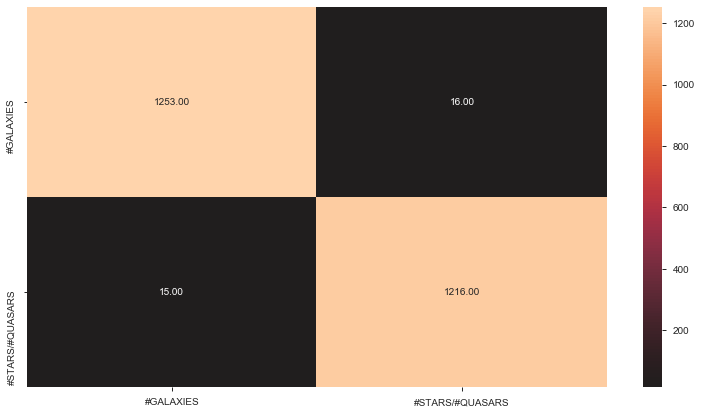

In [45]:
# Let's check the confusion matrix
bagging_cm = metrics.confusion_matrix(test_Y, bgclass_best.predict(test_X))
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
sns.heatmap(bagging_cm, annot=True, fmt='.2f', xticklabels=['#GALAXIES', '#STARS/#QUASARS'], yticklabels=['#GALAXIES', '#STARS/#QUASARS'], ax=ax, center=0)
plt.show()

In [46]:
# RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
param_grid = { 'n_estimators': range(25, 27),
               #'max_samples' : range(700, 701),
               'max_features' : range(3, 6),
             }
rfclass = GridSearchCV(RandomForestClassifier(oob_score=True, n_jobs = -1), param_grid, cv=10).fit(train_X, train_Y)

In [47]:
rfclass.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [48]:
# Random Forest MODEL WITH BEST PARAMETERS
rfclass.best_params_

{'max_features': 4, 'n_estimators': 25}

In [49]:
rfclass.best_score_

0.9886666666666667

In [50]:
rfclass_best = RandomForestClassifier(max_features=4, n_estimators=25).fit(train_X, train_Y)

In [51]:
metrics.accuracy_score(train_Y, rfclass_best.predict(train_X))

0.9994666666666666

In [52]:
metrics.accuracy_score(test_Y, rfclass_best.predict(test_X))

0.9876

In [53]:
list(rfclass_best.feature_importances_)

[0.020530727057165306,
 0.014004758691532847,
 0.011034639127740149,
 0.926125716455033,
 0.02501947022558808,
 0.00046187709147697776,
 0.0004614622353903741,
 0.0008772448802269525,
 0.000528631715669321,
 0.0009554725201769094]

In [54]:
# Let's take this as my best model and calculate metrics and report now
# For Train Data
print(metrics.classification_report(train_Y, rfclass_best.predict(train_X)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3729
           2       1.00      1.00      1.00      3771

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



In [55]:
# Classification Report for Test Data
print(metrics.classification_report(test_Y, rfclass_best.predict(test_X)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1269
           2       0.99      0.99      0.99      1231

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500



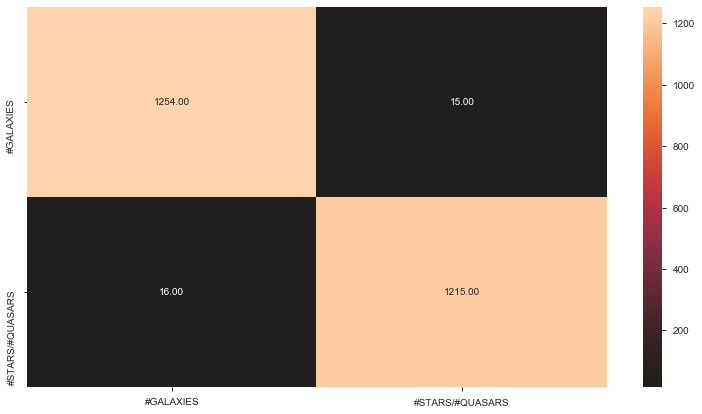

In [56]:
# Let's check the confusion matrix
rf_cm = metrics.confusion_matrix(test_Y, rfclass_best.predict(test_X))
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
sns.heatmap(rf_cm, annot=True, fmt='.2f', xticklabels=['#GALAXIES', '#STARS/#QUASARS'], yticklabels=['#GALAXIES', '#STARS/#QUASARS'], ax=ax, center=0)
plt.show()

#### Let's Perform Boosting - AdaBOOST and GRADIENT BOOSTING (GBM)

In [57]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = { 'n_estimators' : [100, 200, 400, 600, 800], 'learning_rate' : [10**x for x in range(-3, 3)] }
ada_class = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid_ada, cv=10, verbose=True, n_jobs=-1).fit(train_X, train_Y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


In [58]:
ada_class_best_est = ada_class.best_estimator_
ada_class_best_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
ada_class_best_model.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=200, random_state=None)

In [59]:
print("TRAIN CLASSIFICATION REPORT:\n{}".format(metrics.classification_report(train_Y, ada_class_best_model.predict(train_X))))
print("\tTRAIN ACCURACY SCORE : {}".format(metrics.accuracy_score(train_Y, ada_class_best_model.predict(train_X))))

TRAIN CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3729
           2       0.99      0.99      0.99      3771

    accuracy                           0.99      7500
   macro avg       0.99      0.99      0.99      7500
weighted avg       0.99      0.99      0.99      7500

	TRAIN ACCURACY SCORE : 0.9890666666666666


In [60]:
print("TEST CLASSIFICATION REPORT:\n{}".format(metrics.classification_report(test_Y, ada_class_best_model.predict(test_X))))
print("\tTEST ACCURACY SCORE : {}".format(metrics.accuracy_score(test_Y, ada_class_best_model.predict(test_X))))

TEST CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1269
           2       0.99      0.99      0.99      1231

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

	TEST ACCURACY SCORE : 0.988


In [61]:
# LET'S CHECK THE CROSS VALIDATION SCORES FOR THE ABOVE
from sklearn.model_selection import cross_val_score
print("TRAIN DATA CV=10 METRICS:\n{}".format(pd.Series(cross_val_score(ada_class_best_est, train_X, train_Y, cv=10)).describe()[['min', 'mean', 'max']]))
print("TEST DATA CV=10 METRICS:\n{}".format(pd.Series(cross_val_score(ada_class_best_est, test_X, test_Y, cv=10)).describe()[['min', 'mean', 'max']]))

TRAIN DATA CV=10 METRICS:
min     0.984000
mean    0.988667
max     0.994667
dtype: float64
TEST DATA CV=10 METRICS:
min     0.9760
mean    0.9868
max     0.9920
dtype: float64


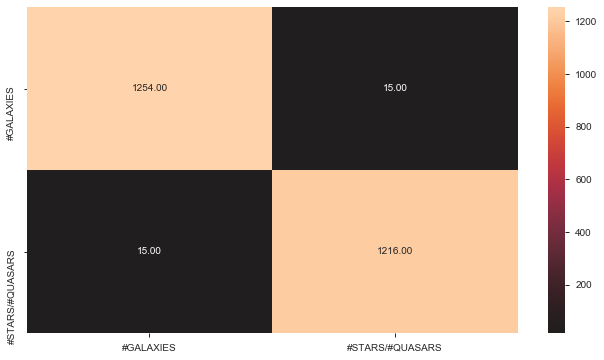

In [62]:
# Confusion Matrix For AdaBoost Algo
ada_cm = metrics.confusion_matrix(test_Y, ada_class_best_model.predict(test_X))
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
sns.heatmap(ada_cm, annot=True, fmt='.2f', xticklabels=['#GALAXIES', '#STARS/#QUASARS'], yticklabels=['#GALAXIES', '#STARS/#QUASARS'], ax=ax, center=0)
plt.show()

In [63]:
print("BEST PARAMETERS :\t{}".format(ada_class.best_params_))
print("MODEL SCORE:\t{}".format(ada_class.best_score_))
print("BEST ESTIMATORS FOR THIS MODEL:\t{}".format(ada_class.best_estimator_))

BEST PARAMETERS :	{'learning_rate': 0.01, 'n_estimators': 200}
MODEL SCORE:	0.9886666666666667
BEST ESTIMATORS FOR THIS MODEL:	AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=200, random_state=None)


With the above parameters we conclude our best model as the one with accuracy on train data = 99.5% and test data as 99.2%